In [1]:
import sys
sys.path.append('..')
import os
import re

import lcatools


In [2]:
EI_version = '3.2'
model = 'undefined'

data_dir = os.path.join('/data','LCI','Ecoinvent', EI_version, model)
zip_dir = os.path.join(os.path.expanduser('~'), 'Dropbox', 'data', 'Ecoinvent', EI_version)
catalog_dir = os.path.join(os.path.expanduser('~'), 'GitHub', 'lca-tools-datafiles', 'catalogs')

spold = 'current_Version_' + EI_version + '_' + model + '_ecoSpold02.7z'

In [3]:
from lcatools.providers.archive import Archive

In [6]:
A = Archive(os.path.join(zip_dir, spold))

Found Extension: 7z


In [7]:
l = A.listfiles('datasets')[:10]

In [8]:
l

['datasets/00009573-c174-463a-8ebf-183ec587ba0d_7cb72345-4338-4f2d-830f-65bba3530fdb.spold',
 'datasets/00137c74-429d-4cd4-b9be-c70e88f0d3a7_6f13ac10-76f1-42c1-a46e-7dabda411274.spold',
 'datasets/00137c74-429d-4cd4-b9be-c70e88f0d3a7_aabed306-e9a0-4441-86ac-5936fe671ed2.spold',
 'datasets/001b1457-2b18-48de-913a-dee0f3064bb3_cb388ab7-cbc9-412f-ab11-811c808a8004.spold',
 'datasets/0023ecb0-cb93-446b-a181-e307571b203c_db14b1bf-6c5e-4db1-833e-6bf331874714.spold',
 'datasets/0036e50d-8e5b-438c-b94c-4ee40350362b_66c93e71-f32b-4591-901c-55395db5c132.spold',
 'datasets/003b13f0-18f4-467d-91a6-4201072dadaa_759b89bd-3aa6-42ad-b767-5bb9ef5d331d.spold',
 'datasets/003f9a31-c540-4351-a434-3b1b1c791b99_66c93e71-f32b-4591-901c-55395db5c132.spold',
 'datasets/00420798-e9d1-4de9-8745-09bd85f31db8_66c93e71-f32b-4591-901c-55395db5c132.spold',
 'datasets/00420798-e9d1-4de9-8745-09bd85f31db8_71e2f1db-a2c5-44d0-8337-dfff15be974d.spold']

In [9]:
uuid_regex = re.compile('([0-9a-f]{8}.?([0-9a-f]{4}.?){3}[0-9a-f]{12})')

In [10]:
uuid_regex.findall(l[0])

[('00009573-c174-463a-8ebf-183ec587ba0d', '8ebf-'),
 ('7cb72345-4338-4f2d-830f-65bba3530fdb', '830f-')]

In [3]:
from lcatools.providers.ecospold2 import EcospoldV2Archive

In [4]:
EU = EcospoldV2Archive(os.path.join(zip_dir,spold), prefix='datasets - public')

Found Extension: 7z


In [5]:
EU.list_datasets()[:10]

['00093951-0c71-4a74-96d8-ece56003838a_b335722e-f52e-44cd-b335-a6686c7fe3ab.spold',
 '000b493f-5e76-4fe0-93ca-73b49263c1fc_29fbcb1d-79ca-45df-8eec-3e51bb95979d.spold',
 '001a7c31-a39b-4606-9877-d6cfc36e5fd8_47e8f15f-6a0b-4ec5-be7d-8965ce014081.spold',
 '001b83bb-d07c-4c91-90c1-5a9437badf06_089f5c04-e340-42c4-bf9c-e8ec6174443a.spold',
 '001fa547-fbbd-4172-9492-0f58076c4553_7f56554d-e090-4df5-b538-3a235b534353.spold',
 '002da2f2-595b-427e-ae3a-3f7dcd769715_6eb408db-980a-4b9e-82a8-b6dca183ec35.spold',
 '002f9105-f892-4241-9c45-b3b7d68a9c72_99e47244-0ecd-4d45-8d79-f4e3cb384d05.spold',
 '00352317-8629-4778-96a7-abfa11c1face_dcb70fd5-e305-4920-b68b-40697cc6a206.spold',
 '0036e50d-8e5b-438c-b94c-4ee40350362b_66c93e71-f32b-4591-901c-55395db5c132.spold',
 '003ad59e-1069-4a8f-ada1-6785cf19e74b_77c1da70-f6b7-47eb-a986-4d70a4bf31a1.spold']

In [6]:
l = EU.list_datasets()[:10]

In [7]:
EU._quiet = False

In [8]:
EU.retrieve_or_fetch_entity(l[1])

Adding process entity with 000b493f-5e76-4fe0-93ca-73b49263c1fc: chlorine dioxide production
Adding quantity entity with 487df68b-4994-4027-8fdc-a4dc298257b7: EcoSpold Quantity kg
Adding flow entity with 29fbcb1d-79ca-45df-8eec-3e51bb95979d: chlorine dioxide
Identified reference exchange
 chlorine dioxide production [GLO] has Output: chlorine dioxide (CAS 10049-04-4) [By-product classification: allocatable product] [kg]
Adding flow entity with edcfa83a-363a-4b2d-8d6a-612e32dfcdfc: sodium chloride, powder
Adding quantity entity with 77ae64fa-7e74-4252-9c3b-889c1cd20bfc: EcoSpold Quantity kWh
Adding flow entity with 759b89bd-3aa6-42ad-b767-5bb9ef5d331d: electricity, medium voltage
Adding quantity entity with 5b972631-34e3-4db7-a615-f6931770a0cb: EcoSpold Quantity unit
Adding flow entity with 3d0fe4e0-eac9-4704-b3fd-09b8594d0fbe: chemical factory, organics
Adding flow entity with 6c9cf309-10ae-4fde-8f55-d2debd3103c2: sodium chlorate, powder
Adding flow entity with 9d63da75-8289-4b96-a900-

In [9]:
[str(x) for x in EU.processes()[0].exchanges()]

[' Input:     [0.024 [m3]] Water, cooling, unspecified natural origin (CAS 007732-18-5) [natural resource, in water]',
 ' Input:     [0.912 [kg]] sodium chloride, powder (CAS 7647-14-5) [By-product classification: allocatable product]',
 ' Input:     [0.333 [kWh]] electricity, medium voltage [By-product classification: allocatable product]',
 ' Input:     [4e-10 [unit]] chemical factory, organics [By-product classification: allocatable product]',
 ' Input:     [1.66 [kg]] sodium chlorate, powder (CAS 7775-09-9) [By-product classification: allocatable product]',
 ' Input:     [0.012 [m3]] Water, unspecified natural origin (CAS 007732-18-5) [natural resource, in water]',
 ' Input:     [2 [MJ]] heat, district or industrial, natural gas [By-product classification: allocatable product]',
 ' Input:     [1.53 [kg]] sulfuric acid [By-product classification: allocatable product]',
 'Output:     [0.0277 [kg]] Chloride (CAS 016887-00-6) [water, surface water]',
 'Output:     [0.0242 [m3]] Water (

In [10]:
p = EU.processes()[0]

In [11]:
px = [x for x in p.exchanges()]

In [12]:
str(px[-1])

'Output:     [0.0242 [m3]] Water (CAS 007732-18-5) [water, unspecified]'

In [13]:
px[-1].__dict__

{'_ref_flow': '2404b41a-2eed-4e9d-8ab6-783946fdf5d6',
 '_value': 0.02424,
 '_value_dict': {'29fbcb1d-79ca-45df-8eec-3e51bb95979d': 0.02424},
 'direction': 'Output',
 'flow': <lcatools.entities.LcFlow at 0x7fa300c60278>,
 'process': <lcatools.entities.LcProcess at 0x7fa300c533c8>,
 'termination': None,
 'unit': <lcatools.entities.LcUnit at 0x7fa300c53fd0>}

In [16]:
EU.list_datasets(EU.processes()[0].get_uuid())

['00093951-0c71-4a74-96d8-ece56003838a_b335722e-f52e-44cd-b335-a6686c7fe3ab.spold']

In [19]:
for f in EA.list_datasets('0ac9332f'):
    EA._fetch(f)

NameError: name 'EA' is not defined

In [23]:
g = (EA.processes()[0].exchanges())

In [29]:
next(g).__dict__

{'_ref_flow': '6ab2abde-801d-45a3-8ea3-455d0f01c3f4',
 '_value': None,
 '_value_dict': {'45fbbc41-7ae9-46cc-bb31-abfa11e69de0': '0'},
 'direction': 'Input',
 'flow': <lcatools.entities.LcFlow at 0x7fc0d6c0f5f8>,
 'process': <lcatools.entities.LcProcess at 0x7fc0d6c00588>,
 'quantity': <lcatools.entities.LcQuantity at 0x7fc0d6c00b38>}

In [20]:
def qprint(*args):
    print(*args)

In [22]:
stuff='foo'

In [23]:
qprint('this is the %s' % stuff)

this is the foo


In [13]:
b = set([a])

In [10]:
EU._quiet = True


In [11]:
EU.load_all()

Loading /home/b/Dropbox/data/Ecoinvent/3.2/current_Version_3.2_undefined_ecoSpold02.7z
 Loaded 100 processes (t=16.10 s)
 Loaded 200 processes (t=17.66 s)
 Loaded 300 processes (t=19.07 s)
 Loaded 400 processes (t=40.12 s)


KeyboardInterrupt: 

In [15]:
len(EU.processes())

16

In [17]:
[str(x) for x in EU['00463986-6243-48f9-9af3-c2b98d95a832'].exchanges()]

[' Input:     [0.000682 [kg]] lubricating oil [By-product classification: allocatable product]',
 ' Input:     [1.14e-07 [unit]] heat and power co-generation unit, 160kW electrical, components for heat only [By-product classification: allocatable product]',
 ' Input:     [1.14e-07 [unit]] heat and power co-generation unit, 160kW electrical, components for electricity only [By-product classification: allocatable product]',
 ' Input:     [1.14e-07 [unit]] heat and power co-generation unit, 160kW electrical, common components for heat+electricity [By-product classification: allocatable product]',
 'Output:     [0.00109 [kg]] Carbon monoxide, non-fossil (CAS 000630-08-0) [air, non-urban air or from high stacks]',
 'Output:     [1.59e-10 [kg]] Platinum (CAS 007440-06-4) [air, non-urban air or from high stacks]',
 'Output:     [0.000682 [kg]] waste mineral oil [By-product classification: Waste]',
 'Output: {*} [-1 [m3]] biogas [By-product classification: allocatable product]',
 'Output:     

In [61]:
len({x.get_uuid() for x in EU.processes()})

1040

In [66]:
z = [x for x in EU.processes()[0]._exchanges]

In [71]:
for k in z:
    print(k.values())

dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.00115)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.018)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 1.0)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 2.8e-05)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.000779)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 2.5e-07)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.01269)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.267)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 2.41)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.000508)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.2356)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.00196)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.000252)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.0008875)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a585', 0.111)])
dict_items([('6d7a9035-752d-4b84-ad72-bde1a987a58

In [10]:
from lcatools.interfaces import uuid_regex

In [23]:
uuids = [x[0] for y in EU.list_datasets() for x in uuid_regex.findall(y) ]

In [35]:
process_uuids = uuids[0::2]
flow_uuids = uuids[1::2]

In [41]:
len(set(flow_uuids))

2737

In [46]:
import matplotlib.pyplot as plt
import plotly.plotly as py

In [53]:
%matplotlib inline

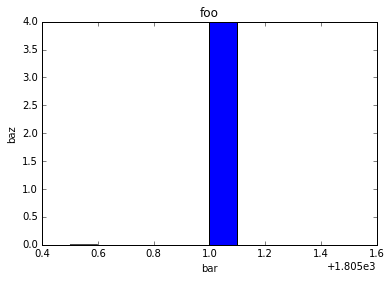

In [58]:
plt.hist([len(x._exchanges) for x in EU.processes() if len(x._exchanges) > 1000])
plt.title('foo')
plt.xlabel('bar')
plt.ylabel('baz')


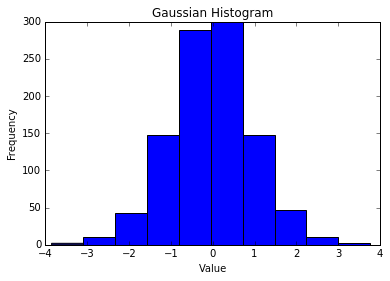

In [54]:
import matplotlib.pyplot as plt
from numpy.random import normal
gaussian_numbers = normal(size=1000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [7]:
f = EU._fetch_filename(fname)

In [14]:
len(f.decode())

1066974

In [11]:
str(f)[:1000]

'b\'\\xef\\xbb\\xbf<?xml version="1.0" encoding="utf-8"?>\\n<ecoSpold xmlns="http://www.EcoInvent.org/EcoSpold02">\\n  <activityDataset>\\n    <activityDescription>\\n      <activity id="023459eb-219f-4d85-bc6f-6031652b51ee" activityNameId="3acee32c-27cd-4aa4-baf0-f003ba9f53b0" inheritanceDepth="0" type="1" specialActivityType="0" energyValues="0">\\n        <activityName xml:lang="en">layered sodium silicate production, SKS-6, powder</activityName>\\n        <includedActivitiesStart xml:lang="en" />\\n        <includedActivitiesEnd xml:lang="en">This module contains material and energy input, production of waste and emissions for the production of SKS-6 sodium silicate powder. Transport and infrastructure have been estimated. The input of compressed air is not reported in the data according to the methodology of the study.</includedActivitiesEnd>\\n        <generalComment>\\n          <text xml:lang="en" index="1">data based on information from the major European producer</text>\\n   

In [6]:
len(EA.processes())

452

In [7]:
g = set()
g.add('a')
g.add('B')
g.add(42)

In [8]:
g

{'B', 42, 'a'}

In [14]:
g.pop()

KeyError: 'pop from an empty set'

In [16]:
help(g.remove)

Help on built-in function remove:

remove(...) method of builtins.set instance
    Remove an element from a set; it must be a member.
    
    If the element is not a member, raise a KeyError.



In [17]:
d = { 'foo':'bar', 'baz':42}

In [19]:
d.update(None)

TypeError: 'NoneType' object is not iterable

In [21]:
from lcatools.literate_float import LiterateFloat

In [22]:
l = LiterateFloat(47.2)

In [26]:
isinstance(l, int)

False